In [1]:
!pip install numpy

In [2]:
!pip install mne

In [85]:
!pip install matplotlib

In [12]:
!pip install tensorflow

In [24]:
!pip install Counter

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5425 sha256=f4a522b9c9c40369c16b58366f26e35550fbde81c94d62dda8399469f15e693d
  Stored in directory: c:\users\bhatt\appdata\local\pip\cache\wheels\16\ff\7a\6e8bf2fdadb47c50a03bb4b9a59bd2b1da1b876faf8e3815d9
Successfully built Counter


In [13]:
!pip install keras

In [90]:
!pip install seaborn

In [3]:
!pip install scikit-learn

In [26]:
import mne
import numpy as np
from collections import Counter

In [27]:
file_path = "C://Users//bhatt//OneDrive//Desktop//seziure//chb01_01.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

Extracting EDF parameters from C:\Users\bhatt\OneDrive\Desktop\seziure\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\bhatt\AppData\Local\Temp\ipykernel_18708\781974086.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


In [36]:
channel_names = raw.ch_names
print("Available Channels:", channel_names)

Available Channels: ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']


In [42]:
eeg_channels = [ch for ch in channel_names if 'EEG' in ch]

In [49]:
raw.pick_channels(eeg_channels)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Measurement date,"November 06, 2076 11:42:54 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [95]:
raw.filter(1., 40.)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Measurement date,"November 06, 2076 11:42:54 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [51]:
epochs = mne.make_fixed_length_epochs(raw, duration=2., preload=True)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 512 original time points ...
0 bad epochs dropped


In [53]:
X = epochs.get_data(copy=True)
y = np.zeros(len(X))

In [54]:
print(f"Data shape: {X.shape}")

Data shape: (1800, 23, 512)


In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [106]:
model = Sequential()

In [107]:
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

In [62]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [63]:
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9770 - loss: 0.5635 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 4.4339e-05
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 1.4939e-04 - val_accuracy: 1.0000 - val_loss: 2.0030e-05
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 7.4632e-05 - val_accuracy: 1.0000 - val_loss: 9.4002e-06
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 5.7061e-05 - val_accuracy: 1.0000 - val_loss: 3.8632e-06
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 1.5834e-05 - val_accuracy: 1.0000 - val_loss: 2.0706e-06
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 1.3760e-05 - val_accuracy: 1.0000 - val_loss: 8.8310e-07
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - l

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [70]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       540

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [82]:
labels = [0, 1]

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred_binary, labels=labels)

print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[540   0]
 [  0   0]]


In [86]:
import matplotlib.pyplot as plt

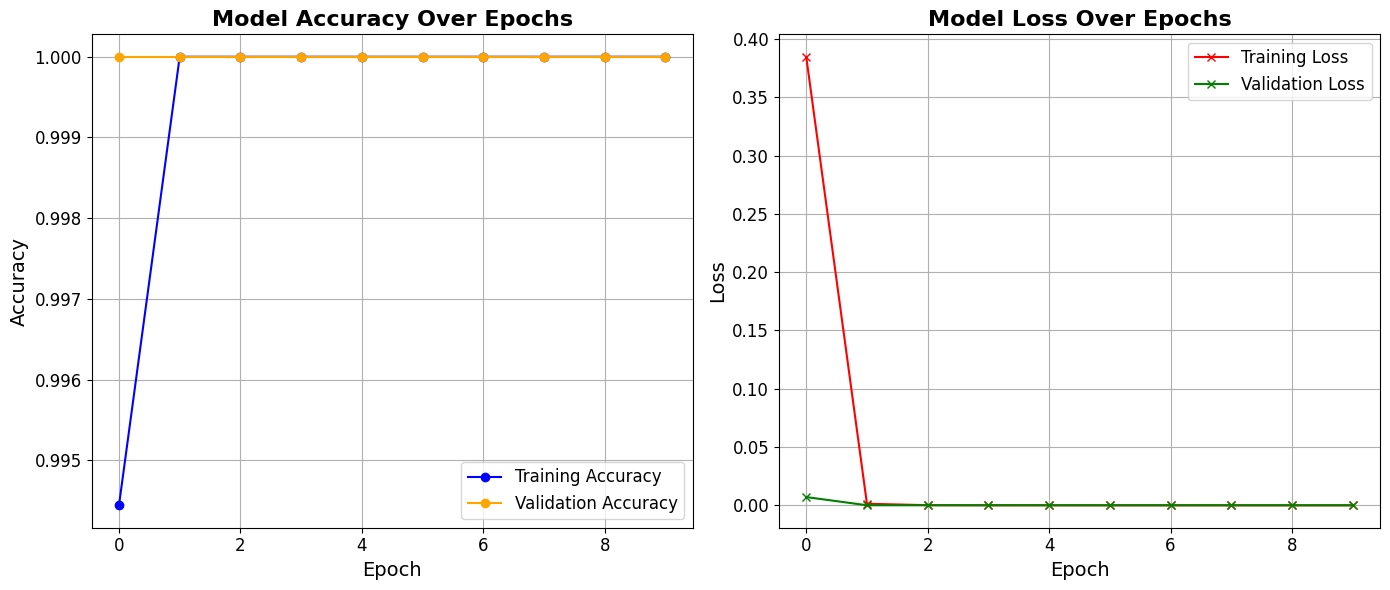

In [93]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='blue', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], color='orange', linestyle='-', marker='o')
plt.title('Model Accuracy Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right', fontsize=12)
plt.grid(True)

# Enhanced Plotting: Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red', linestyle='-', marker='x')
plt.plot(history.history['val_loss'], color='green', linestyle='-', marker='x')
plt.title('Model Loss Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=12)
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()